Osoby wykonujące projekt:
1.   Radosław Mikołajczyk, rmikolajczyk@student.agh.edu.pl
2.   Karolina Filipiuk, kfilipiuk@student.agh.edu.pl



# Projekt z programowania probabilistycznego

Każda grupa ma osobny zestaw danych do opracowania. Każdy zestaw składa się z 2500 próbek opisujących oceny filmów przez różnych ludzi. Każdy rekord zawiera następujące informacje:

1.   id filmu
2.   id osoby wystawiającej ocenę
3.   id gatunku do którego należy film
4.   ocenę wystawioną przez określoną osobę określonemu filmowi

Każda baza danych obejmuje 200 filmów należących do 5 gatunków. Filmy oceniane były przez 25 ludzi. Ta sama osoba mogła wystawić więcej niż jedną ocenę jeżli widziała określony film wielokrotnie.

Dla uproszczenia analizy oceny filmów są liczbami rzeczywistymi, mogą być zarówno dodatnie jak i ujemne.

W ramach projektu trzeba będzie przygotować modele odpowiadające na poniższe pytania.






## Na 3.0

Przygotuj model opisujący ocenę filmu jako wartość losową określoną rozkładem normalnym. Każdy film ma inną średnią `mu_movie` (którą możemy traktować jako rzeczywistą jakość filmu) którą jesteśmy zainteresowani. Dla uproszczenia zakładamy tę samą wariancję:
```
sigma_movie = pm.Gamma('sigma_movie', alpha=10, beta=5)
mu_movie = pm.Normal('mu_movie', mu=0.0, sigma=sigma_movie, shape=n_movies)
```
Zapisując to matematycznie odchylenie standardowe:

$\sigma_{movie} \sim \Gamma(10, 5)$

średnia dla filmu $i$:

$\mu_i \sim N(0, \sigma_{movie})$

Ocena filmu $i$ z gatunku $g$ przez osobę $o$:

$\mathit{O}_{i,o,g} \sim N(\mu_i, \sigma_{movie})$

Każde $\mathit{O}_{i,o,g}$ odpowiada pojedynczemu rekordowi w danych.

Podaj trzy filmy z najwyższymi ocenami i trzy z najniższymi ocenami.

In [8]:
from google.colab import files
import pandas as pd
import io
import numpy as np
import theano
import theano.tensor as tt
import pymc3 as pm
import arviz as az

import seaborn as sns
import matplotlib.pyplot as plt

uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['dataframe54.csv']), index_col=0)
print(df)

Saving dataframe54.csv to dataframe54 (4).csv
      movie  person  genre      like
0       133      16      1 -1.258079
1        26       6      4  1.522422
2        53      14      4 -8.637161
3        44       8      0 -4.656412
4        21      12      3  2.874161
...     ...     ...    ...       ...
2495     12      11      0 -5.928759
2496     52       1      0 -8.001885
2497    146      13      1 -5.814606
2498     95      23      4  2.767845
2499    167      18      1  2.713440

[2500 rows x 4 columns]


In [9]:
unique_films = df['movie'].unique().shape[0]
print('Liczba filmów z pliku: ', unique_films)

Liczba filmów z pliku:  200


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu_movie, sigma_movie]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 47 seconds.





3 najlepsze filmy:


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_movie[123],6.394,0.881,4.713,8.017,0.006,0.004,23486.0,6855.0,1.0
mu_movie[61],5.668,0.907,3.952,7.373,0.006,0.004,23520.0,5901.0,1.0
mu_movie[16],4.372,0.804,2.849,5.869,0.005,0.004,27736.0,7014.0,1.0





3 najgorsze filmy:


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_movie[30],-7.184,1.002,-9.038,-5.230,0.007,0.005,19952.0,6058.0,1.0
mu_movie[57],-5.655,0.795,-7.117,-4.130,0.005,0.004,23319.0,6454.0,1.0
mu_movie[25],-5.206,0.868,-6.765,-3.508,0.005,0.004,26557.0,7215.0,1.0





Wartosci dla wszystkich filmów(od najlepszych):



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,film_id
mu_movie[123],6.394,0.881,4.713,8.017,0.006,0.004,23486.0,6855.0,1.0,149
mu_movie[61],5.668,0.907,3.952,7.373,0.006,0.004,23520.0,5901.0,1.0,190
mu_movie[16],4.372,0.804,2.849,5.869,0.005,0.004,27736.0,7014.0,1.0,64
mu_movie[194],4.161,0.910,2.419,5.802,0.006,0.004,26322.0,6613.0,1.0,73
mu_movie[149],4.047,0.903,2.388,5.799,0.006,0.004,25168.0,6398.0,1.0,117
...,...,...,...,...,...,...,...,...,...,...
mu_movie[118],-4.476,0.783,-5.916,-2.983,0.005,0.004,24526.0,6610.0,1.0,84
mu_movie[92],-4.585,0.876,-6.226,-2.906,0.006,0.004,24005.0,6401.0,1.0,186
mu_movie[25],-5.206,0.868,-6.765,-3.508,0.005,0.004,26557.0,7215.0,1.0,43
mu_movie[57],-5.655,0.795,-7.117,-4.130,0.005,0.004,23319.0,6454.0,1.0,189





Odchylenie standardowe:



mean             3.392
sd               0.048
hdi_3%           3.300
hdi_97%          3.480
mcse_mean        0.000
mcse_sd          0.000
ess_bulk     19162.000
ess_tail      7673.000
r_hat            1.000
Name: sigma_movie, dtype: float64

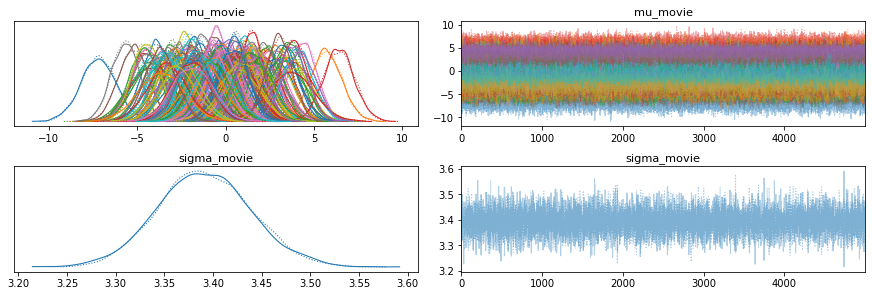

In [16]:
with pm.Model() as model:

  sigma_movie = pm.Gamma('sigma_movie', alpha=10, beta=5)
  mu_movie = pm.Normal('mu_movie', mu=0.0, sigma=sigma_movie, shape=unique_films)
  mu_movie_rate = pm.Normal('mu_movie_rate', mu=mu_movie[df['movie']],
                            sigma=sigma_movie, observed=df['like'])
  
  trace = pm.sample(5000, tune=1000, target_accept=.9)
  az.plot_trace(trace)

  summary = az.summary(trace)

  best_films = summary.sort_values(['mean'], ascending=False).head(3)
  worst_films = summary.sort_values(['mean'], ascending=True).head(3)

  print("\n\n\n3 najlepsze filmy:")
  display(best_films)
  print("\n\n\n3 najgorsze filmy:")
  display(worst_films)

  # Usuwamy ostatni wiersz poniewaz zawiera on podsumowanie wszystkich
  # zmiennych użytych w modelu
  film_means = summary.iloc[:-1,:]
  film_means['film_id'] = df['movie'].unique()
  film_means.sort_values(['mean'], inplace=True, ascending=False)

  # wartości mean dla wszystkich filmów oraz pozostale parametry
  # m.in: sd, hpd_3% i hpd_97%
  print("\n\n\nWartosci dla wszystkich filmów(od najlepszych):\n")
  display(film_means)

  # wartosci dla odchylenia standardowego
  print("\n\n\nOdchylenie standardowe:\n")
  var_summary = summary.iloc[-1]
  display(var_summary)


**Odpowiedź na pytanie**

*Pytanie: Czy sampling kończy się sukcesem? Dlaczego tak uważasz?*

Na podstawie wykresu *plot_trace*, który pokazuje wygenerowane przez model kolejne wartości przewidywanej zmiennej, sampling kończy się sukcesem, ponieważ wykres jest zbieżny, co oznacza że model jest dobry.




## Na 4.0

Niektóre osoby są większymi fanami kina niż inne. Co więcej, kryteria przyznawania tej samej oceny różnią się pomiędzy ludźmi. Ponadto jedne gatunki bywają raczej lepiej oceniane od innych. Rozszerz model o dodatkowe składniki uwzględniające te efekty.

Do średniej dla rozkładu $\mathit{O}_{i,o,g}$ dodaj odpowiednie składniki:

$\mathit{O}_{i,o,g} \sim N(\mu_i + \mu_o + \mu_g, \sigma_{movie})$

gdzie $\mu_o$ oznacza jak ostro ocenia dana osoba i pochodzi z rozkładu

$\mu_o \sim N(0, \sigma_{person})$

zaś $\mu_g$ oznacza jak ostro oceniane są filmy z danego gatunku:

$\mu_g \sim N(0, \sigma_{genre})$.

Przyjmij
```
sigma_person = pm.Gamma('sigma_person', alpha=10, beta=5)
sigma_genre = pm.Gamma('sigma_genre', alpha=10, beta=5)
```

Który gatunek cieszy się największą populatnością a który najmniejszą? Która osoba najbardziej krytycznie ocenia filmy?

Spróbuj usunąć z bazy wszystkie oceny wybranego filmu i zobacz jak to wpłynie na wynik (ocenę usuniętego filmu -- średnią i przedział HPD).

In [40]:
df2 = pd.read_csv(io.BytesIO(uploaded['dataframe54.csv']), index_col=0)
df2.sort_values(by='movie', inplace=True)
print(df2)

      movie  person  genre      like
325       0      14      4 -1.582464
1368      0      17      4 -2.368328
94        0       9      4  0.194374
1849      0       8      4  0.308481
1722      0       3      4 -2.278969
...     ...     ...    ...       ...
1575    199      13      0  0.291325
2074    199      20      0  0.440207
2383    199      11      0 -3.690485
14      199       0      0  0.935686
1630    199      19      0  0.060676

[2500 rows x 4 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  from ipykernel import kernelapp as app
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu_genre2, sigma_genre2, mu_person2, sigma_person2, mu_movie2, sigma_movie2]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 125 seconds.
The number of effective samples is smaller than 25% for some parameters.





Wartosci dla movie:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_movie2[61],5.948,0.834,4.412,7.521,0.013,0.009,4205.0,6558.0,1.0
mu_movie2[123],5.545,0.810,4.019,7.029,0.012,0.009,4532.0,5888.0,1.0
mu_movie2[3],5.190,0.783,3.740,6.711,0.011,0.008,5096.0,6526.0,1.0
mu_movie2[100],4.724,0.868,3.050,6.305,0.011,0.008,6227.0,6687.0,1.0
mu_movie2[149],4.211,0.799,2.730,5.726,0.010,0.007,5996.0,6300.0,1.0
mu_movie2[36],3.997,0.779,2.554,5.481,0.010,0.007,5755.0,6611.0,1.0
mu_movie2[153],3.936,1.067,1.918,5.938,0.012,0.009,7581.0,6692.0,1.0
mu_movie2[143],3.860,0.742,2.506,5.272,0.012,0.008,4021.0,6607.0,1.0
mu_movie2[126],3.859,0.829,2.323,5.426,0.011,0.008,5484.0,6582.0,1.0
mu_movie2[148],3.557,1.009,1.599,5.392,0.012,0.009,6572.0,6882.0,1.0





Wartosci dla person:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_person2[22],4.983,0.489,4.086,5.906,0.014,0.01,1186.0,2468.0,1.0
mu_person2[21],4.194,0.475,3.331,5.108,0.014,0.01,1139.0,2532.0,1.0
mu_person2[10],3.036,0.471,2.128,3.887,0.014,0.01,1132.0,2230.0,1.0
mu_person2[19],1.738,0.471,0.830,2.581,0.014,0.01,1109.0,2510.0,1.0
mu_person2[20],1.576,0.466,0.718,2.459,0.014,0.01,1084.0,2459.0,1.0
mu_person2[1],1.555,0.479,0.700,2.490,0.014,0.01,1122.0,2441.0,1.0
mu_person2[23],1.335,0.461,0.457,2.174,0.014,0.01,1086.0,2281.0,1.0
mu_person2[4],0.587,0.476,-0.277,1.498,0.014,0.01,1136.0,2532.0,1.0
mu_person2[6],0.527,0.472,-0.361,1.383,0.014,0.01,1131.0,2298.0,1.0
mu_person2[12],0.406,0.481,-0.467,1.322,0.014,0.01,1169.0,2543.0,1.0





Wartosci dla genre:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_genre2[3],0.714,0.543,-0.333,1.709,0.015,0.011,1266.0,2155.0,1.0
mu_genre2[2],0.561,0.603,-0.608,1.648,0.016,0.011,1428.0,2239.0,1.0
mu_genre2[1],0.488,0.568,-0.591,1.543,0.016,0.011,1293.0,2696.0,1.0
mu_genre2[4],-0.802,0.526,-1.816,0.163,0.016,0.011,1093.0,2137.0,1.0
mu_genre2[0],-1.896,0.570,-2.939,-0.814,0.017,0.012,1184.0,2258.0,1.0


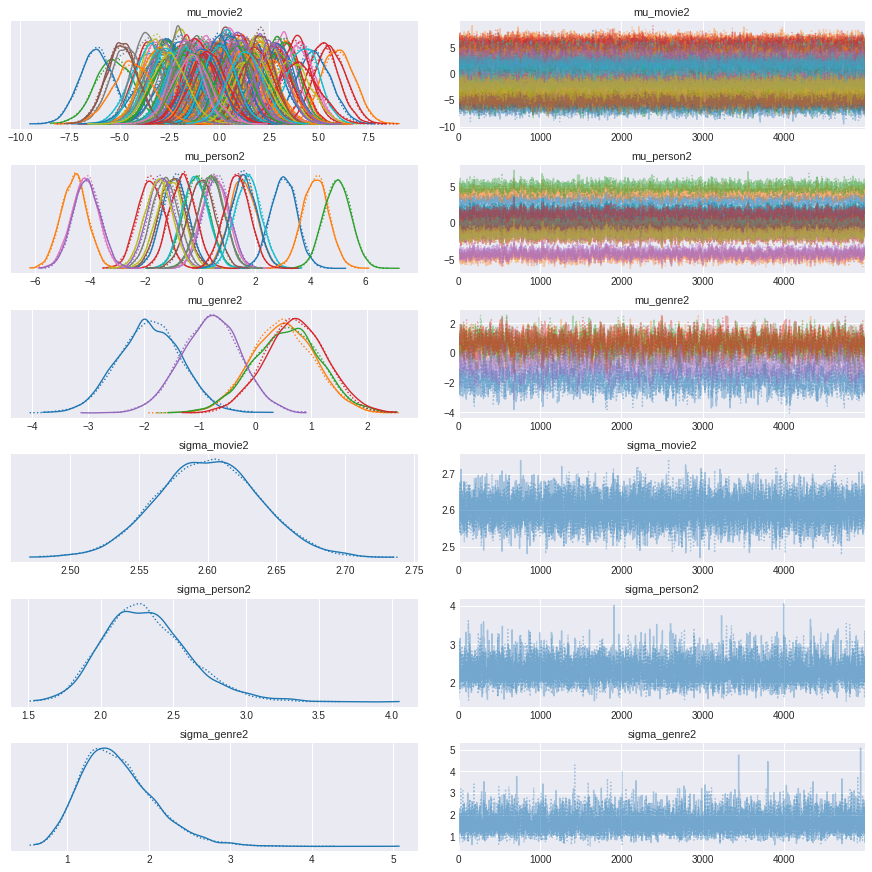

In [43]:
with pm.Model() as model2:
  sigma_movie2 = pm.Gamma('sigma_movie2', alpha=10, beta=5)
  mu_movie2 = pm.Normal('mu_movie2', mu=0.0, sigma=sigma_movie2, shape=df2['movie'].unique().shape[0])

  sigma_person2 = pm.Gamma('sigma_person2', alpha=10, beta=5)
  mu_person2 = pm.Normal('mu_person2', mu=0.0, sigma=sigma_person2, shape=df2['person'].unique().shape[0])

  sigma_genre2 = pm.Gamma('sigma_genre2', alpha=10, beta=5)
  mu_genre2 = pm.Normal('mu_genre2', mu=0.0, sigma=sigma_genre2, shape=df2['genre'].unique().shape[0])

  
  mu_sum = mu_genre2[df2['genre']] + mu_person2[df2['person']] + mu_movie2[df2['movie']]
  film_likes = pm.Normal('film_likes', mu=mu_sum, sigma=sigma_movie2, observed=df2['like'])

  trace2 = pm.sample(5000, tune=1000, target_accept=.9)
  az.plot_trace(trace2)

  summary2 = az.summary(trace2)

  print("\n\n\nWartosci dla movie:")
  to_idx = df2['movie'].unique().shape[0]

  movie_summary = summary2.iloc[0:to_idx,:]
  movie_summary.sort_values(by=['mean'], inplace=True, ascending=False)
  display(movie_summary)

  print("\n\n\nWartosci dla person:")
  from_idx = df2['movie'].unique().shape[0]
  to_idx = from_idx + df2['person'].unique().shape[0]

  person_summary = summary2.iloc[from_idx:to_idx,:]
  person_summary.sort_values(by=['mean'], inplace=True, ascending=False)
  display(person_summary)

  print("\n\n\nWartosci dla genre:")
  from_idx = df2['movie'].unique().shape[0] + df2['person'].unique().shape[0] 
  to_idx = from_idx + df2['genre'].unique().shape[0]

  genre_summary = summary2.iloc[from_idx:to_idx,:]
  genre_summary.sort_values(by=['mean'], inplace=True, ascending=False)
  display(genre_summary)




**Odpowiedzi na pytania**

*Który gatunek cieszy się największą populatnością a który najmniejszą? Która osoba najbardziej krytycznie ocenia filmy?*

Największą popularnością cieszy się gatunek o indeksie 3, natomiast najmniejszą gatunek o indeksie 0.

Osoba o indeksie 11 najbardziej krytycznie ocenia filmy.

Sampling podobnie jak w zadaniu na 3.0 wydaje się być poprawny.


## Na 5.0

Wzbogać model uwzględniając, że różne osoby w różnym stopniu lubią gatunki filmowe. Rozbuduj model uwzględniajac dodatkowo ten efekt:

```
mu_gp = pm.Normal('mu_gp', mu=0.0, sigma=sigma_person, shape=(n_genres, n_people))
```

Na co Twoim zdaniem wpływa uwzględnianie dodatkowych efektów? Które osoby szczególnie lubią jakiś gatunek?



## Osobno dla każdego modelu opisywanego w sprawozdaniu

Wykonaj sampling z następującymi ustawieniami:
```
trace = pm.sample(5000, tune=1000, target_accept=.9)
```

Czy sampling kończy się sukcesem? Dlaczego tak uważasz? Zapisz w sprawozdaniu wartości `mean`, `sd`, `hpd_3%` i `hpd_97%` dla odchylenia standardowego i 20 pierwszych filmów korzystając z funkcji:
```
arviz.summary(trace)
```
Zanotuj wartości `mean` dla wszystkich filmów.

# Kod do generowania danych testowych

In [17]:
# Arviz służy do wizualizacji modeli Bayesowskich
!pip install arviz 
!pip install 'pymc3==3.11.2'

In [18]:
%matplotlib inline
import numpy as np
import theano
import theano.tensor as tt
import pymc3 as pm
import arviz
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('notebook')
plt.style.use('seaborn-darkgrid')
print('Running on PyMC3 v{}'.format(pm.__version__))

pd.set_option('display.max_rows', 300)

Running on PyMC3 v3.11.2


In [19]:
n_genres = 5
n_people = 25
n_movies = 200

def gen_data(n_examples):
  sigma_person = pm.Gamma.dist(alpha=10, beta=5).random()
  sigma_movie = pm.Gamma.dist(alpha=10, beta=5).random()
  sigma_genre = pm.Gamma.dist(alpha=10, beta=5).random()

  d_mu_m = pm.Normal.dist(mu=0.0, sigma=sigma_movie)
  d_mu_g = pm.Normal.dist(mu=0.0, sigma=sigma_genre)
  mu_movie = [d_mu_m.random() for gi in range(n_movies)] # średnia ocena filmu
  mu_genre = [d_mu_g.random() for gi in range(n_genres)] # średnia ocena gatunku
  d_mu_person = pm.Normal.dist(mu=0.0, sigma=sigma_person)

  mu_person = [d_mu_person.random() for _ in range(n_people)] # średnia ocena prez osobę
  d_mu_gp = pm.Normal.dist(mu=0.0, sigma=sigma_person)
  mu_gp = [[d_mu_gp.random() for _ in range(n_people)] for _ in range(n_genres)] # średnia ocena gatunku prez osobę

  d_genre = pm.DiscreteUniform.dist(0, n_genres-1)
  d_person = pm.DiscreteUniform.dist(0, n_people-1)
  d_movie = pm.DiscreteUniform.dist(0, n_movies-1)

  movie_to_genre = [d_genre.random() for _ in range(n_movies)]

  def gen_random():
    movie = d_movie.random()
    person = d_person.random()
    genre = movie_to_genre[movie]
    like = pm.Normal.dist(mu=mu_movie[movie] + mu_genre[genre] + mu_person[person] + mu_gp[genre][person], sigma=sigma_person).random()
    return [movie, person, genre, like]

  df = pd.DataFrame(np.array([gen_random() for _ in range(n_examples)]),
                    columns=['movie', 'person', 'genre', 'like'])
  dataframe = df.astype({"movie": int, "person": int, "genre": int})
  return (dataframe, mu_movie, mu_genre, mu_person, mu_gp, movie_to_genre, sigma_person, sigma_movie, sigma_genre)
  
dataframe, orig_mu_movie, orig_mu_genre, orig_mu_person, mu_gp, movie_to_genre, orig_sigma_person, orig_sigma_movie, orig_sigma_genre = gen_data(2500)

# dataframe -- dane testowe w odpowiednim formacie do analizy
# orig_* -- ukryte zmienne objaśniające które nie są znane

# Można weryfikować poprawność modelu generując nowe dane i sprawdzając czy wygenerowane wartości zmiennych (orig_*) objaśniających mniej więcej odpowiadają tym które zwraca model.


def save_data(id, dataframe, orig_mu_movie, orig_mu_genre, orig_mu_person, mu_gp, movie_to_genre, orig_sigma_person, orig_sigma_movie, orig_sigma_genre):
  dataframe.to_csv(f'/content/drive/My Drive/Colab Notebooks/ProbProbProjData/dataframe {id}.csv')
  with open(f'/content/drive/My Drive/Colab Notebooks/ProbProbProjData/latent {id}.txt', 'w') as f:
    f.write(f'orig_sigma_person = {orig_sigma_person}\n')
    f.write(f'orig_sigma_movie = {orig_sigma_movie}\n')
    f.write(f'orig_sigma_genre = {orig_sigma_genre}\n')
    f.write('orig_mu_movie = \n')
    for i in range(n_movies):
      f.write(f'{i}\t{orig_mu_movie[i]}')
      f.write('\n')
    f.write('orig_mu_genre = \n')
    for i in range(n_genres):
      f.write(f'{i}\t{orig_mu_genre[i]}')
      f.write('\n')
    f.write('orig_mu_person = \n')
    for i in range(n_people):
      f.write(f'{i}\t{orig_mu_person[i]}')
      f.write('\n')
    f.write('movie_to_genre = \n')
    for i in range(n_movies):
      f.write(f'{i}\t{movie_to_genre[i]}')
      f.write('\n')
    f.write('orig_mu_gp = \n')
    for i in range(n_genres):
      f.write(f'{i}')
      for j in range(n_people):
        f.write(f'\t{mu_gp[i][j]}')
      f.write('\n')

# for i in range(100):
#   save_data(i, *gen_data(2500))

print("sigmas", orig_sigma_person, orig_sigma_movie, orig_sigma_genre)
display(dataframe.describe())
display(dataframe)
print("mu_genre")
display(orig_mu_genre)
print("mu_person")
display(orig_mu_person)
print("mu_movie")
display(orig_mu_movie)

sigmas 2.6891525414934074 1.7516382775128811 2.2698993781878904


,movie,person,genre,like
count,2500.000000,2500.000000,2500.00000,2500.000000
mean,99.947200,12.324800,2.14200,-1.102701
std,58.651135,7.214161,1.46051,5.492755
min,0.000000,0.000000,0.00000,-20.977570
25%,49.000000,6.000000,1.00000,-4.803210
50%,100.000000,12.500000,2.00000,-1.173130
75%,151.000000,19.000000,3.00000,2.470186
max,199.000000,24.000000,4.00000,13.390097


,movie,person,genre,like
0,180,23,4,9.412612
1,152,4,0,-10.883159
2,42,1,0,-4.963234
3,87,12,4,-0.942590
4,152,20,0,5.996283
...,...,...,...,...
2495,183,22,4,8.113899
2496,168,13,2,-5.324497
2497,66,10,3,-7.356116
2498,38,4,3,-11.048147


mu_genre


[array(-2.9226635),
 array(1.37045219),
 array(0.0005743),
 array(-5.1870594),
 array(2.92081195)]

mu_person


[array(2.22097958),
 array(-5.57174533),
 array(-2.184249),
 array(1.56274137),
 array(-3.0657549),
 array(0.48580652),
 array(-3.39020124),
 array(0.24791539),
 array(1.84317553),
 array(1.1798531),
 array(1.33692022),
 array(0.80591684),
 array(-1.01254139),
 array(-1.70719674),
 array(-5.88107818),
 array(1.9873361),
 array(0.57824013),
 array(1.44149534),
 array(2.80361006),
 array(-0.67866729),
 array(3.94881849),
 array(-0.69586137),
 array(0.31775796),
 array(-0.07930008),
 array(-0.73424619)]

mu_movie


[array(-0.32452115),
 array(1.19402217),
 array(1.29993368),
 array(-0.95080233),
 array(-1.13094246),
 array(-0.97181997),
 array(-2.19625063),
 array(1.62774286),
 array(0.0241714),
 array(-1.14668527),
 array(0.87125206),
 array(-0.21990351),
 array(1.16867618),
 array(2.24360827),
 array(2.72954607),
 array(-2.17887697),
 array(1.09289207),
 array(-4.14348035),
 array(-2.8447305),
 array(2.72293547),
 array(3.20187931),
 array(-0.13351426),
 array(0.69085001),
 array(1.63642197),
 array(-0.74083763),
 array(-1.70138826),
 array(-3.02960963),
 array(-2.10093475),
 array(5.18564516),
 array(0.52452714),
 array(-0.34778072),
 array(3.03083841),
 array(0.71048635),
 array(0.26508689),
 array(0.58195326),
 array(1.51557161),
 array(0.84113154),
 array(4.40238906),
 array(-3.01443005),
 array(-6.01187038),
 array(-4.25838125),
 array(2.73205194),
 array(0.63873308),
 array(-2.92591792),
 array(1.86781293),
 array(1.14956639),
 array(1.55063083),
 array(-1.78170321),
 array(1.99146444),
 